<a href="https://colab.research.google.com/github/emanuelvlas/VGChartz-Srape-Analysis-And-Visualization/blob/main/data_cleaning_and_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning


*   Loop through the 80 pages we got from the scrape and add them to a dataframe
*   Remove duplicates
*   Drop the rank column
*   Display the dataframe







In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import numpy as np

folder_path = Path("/content/drive/MyDrive/Colab Notebooks/video_game_sales_project/data_cleaning")
file_list = [folder_path / f"page{i}.csv" for i in range(1, 81)]
folder_path.mkdir(parents=True, exist_ok=True)

df_list = []
for file in file_list:
    try:
        df_list.append(pd.read_csv(file))
    except Exception as e:
        print(f"Error reading {file}: {e}")

df = pd.concat(df_list, ignore_index=True)


df.drop_duplicates(subset=["Name", "Platform"], keep="first", inplace=True)
df["Year"] = pd.to_datetime(df["Year"], format="%Y", errors="coerce").dt.year
df.drop(columns=["Rank"], inplace=True)

df

<ipython-input-31-a1c8168d2ab3>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,Tetris,Series,1988.0,Puzzle,The Tetris Company,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Call of Duty,Series,2003.0,Shooter,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pokemon,Series,1998.0,Role-Playing,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grand Theft Auto,Series,1998.0,Action-Adventure,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Super Mario,Series,1983.0,Platform,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234943,Zombillie,NS,2018.0,Puzzle,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234944,Zone of the Enders: The 2nd Runner MARS,PC,2018.0,Simulation,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234945,Zoo Tycoon: Ultimate Animal Collection,XOne,2017.0,Simulation,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234946,Zoo Tycoon: Ultimate Animal Collection,PC,2018.0,Simulation,THQ Nordic,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting

# Trend Analysis

Game sales Over Time

Text(0.5, 1.0, 'Global Video Game Sales by Year')

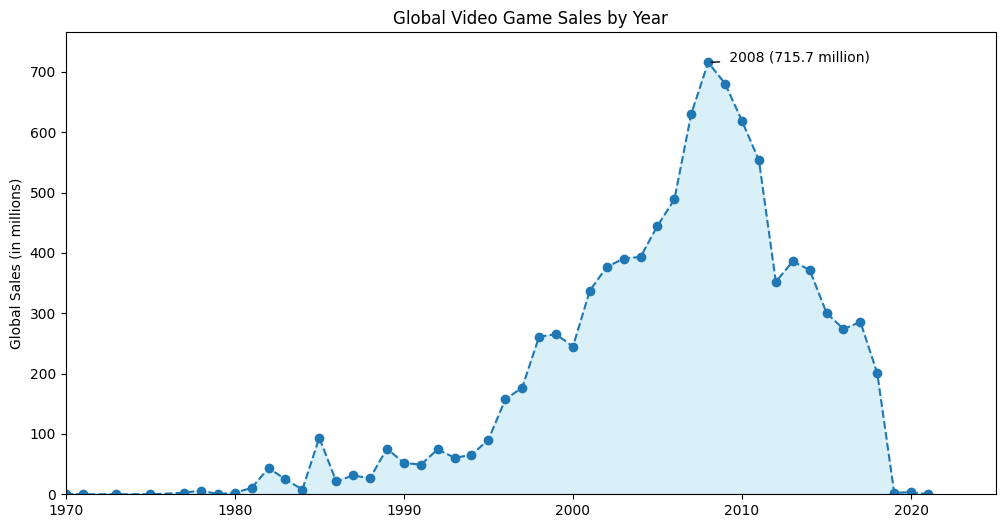

In [51]:
sales_by_year = df.groupby("Year")["Global_Sales"].sum()

highest_sales_year = sales_by_year.idxmax()

# plot
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='--')

plt.annotate(f' {highest_sales_year:.0f} ({sales_by_year[highest_sales_year]} million)',
             xy=(highest_sales_year, sales_by_year[highest_sales_year]),
             xytext=(highest_sales_year + 1, sales_by_year[highest_sales_year] + 1),
             arrowprops=dict(arrowstyle="-", color="black", lw=1)
)

plt.ylim(0, sales_by_year.max() + 50)
plt.xlim(1970,2025)

plt.fill_between(sales_by_year.index, sales_by_year.values, color='skyblue', alpha=0.3)

plt.xlabel("")
plt.ylabel("Global Sales (in millions)")
plt.title("Global Video Game Sales by Year")


Game releases trendline

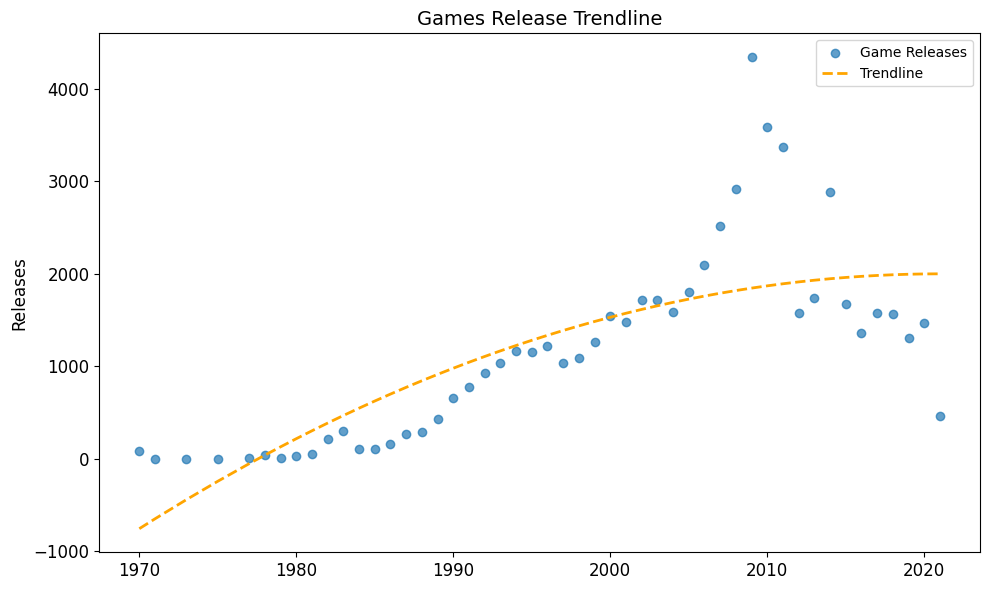

In [33]:
#filter missing data
games_by_year = df[df['Year'].between(1970, 2023)].groupby('Year')['Name'].count()

#plot and trendline
x= games_by_year.index
y= games_by_year.values

z = np.polyfit(x, y, 2)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, label="Game Releases", alpha=0.7)
ax.plot(x, p(x), color="orange", linewidth=2, linestyle="--", label="Trendline")

# lables
ax.set_xlabel("")
ax.set_ylabel("Releases", fontsize=12)
ax.set_title("Games Release Trendline", fontsize=14)

# outlay
plt.xticks(ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
ax.legend()

# Genre Analysis

Genre by region

<ipython-input-35-6d926c3a0083>:7: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_filtered['Region'] = df_filtered[region_columns].idxmax(skipna=True,axis=1)


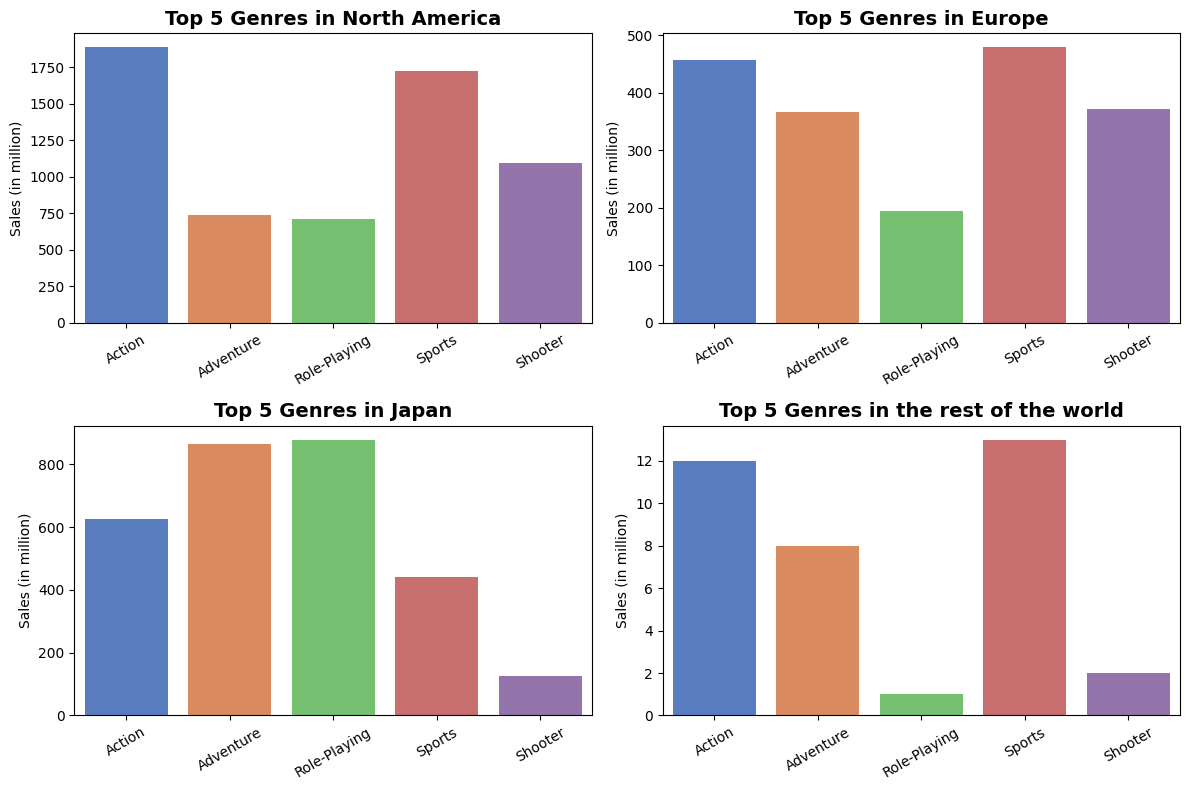

In [35]:

top_genres = df.loc[df['Genre'] != 'Misc', 'Genre'].value_counts().nlargest(5).index
df_filtered = df[df['Genre'].isin(top_genres)].copy()
region_columns = ['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']



df_filtered['Region'] = df_filtered[region_columns].idxmax(skipna=True,axis=1)

region_mapping = {'NA_Sales': 'North America', 'PAL_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'the rest of the world'}
df_filtered['Region'] = df_filtered['Region'].replace(region_mapping)

regions = ['North America', 'Europe', 'Japan', 'the rest of the world']

palette_colors = sns.color_palette("muted", n_colors=len(top_genres))
genre_color_map = dict(zip(top_genres, palette_colors))


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()


for i, region in enumerate(regions):
    ax = axes[i]
    region_data = df_filtered[df_filtered['Region'] == region]
    sns.countplot(data=region_data, x='Genre', ax=ax, order=top_genres,
                  palette=genre_color_map, hue='Genre', legend=False)

    ax.set_title(f"Top 5 Genres in {region}", fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Sales (in million)')
    ax.tick_params(axis='x', rotation=30, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()


Genre world wide

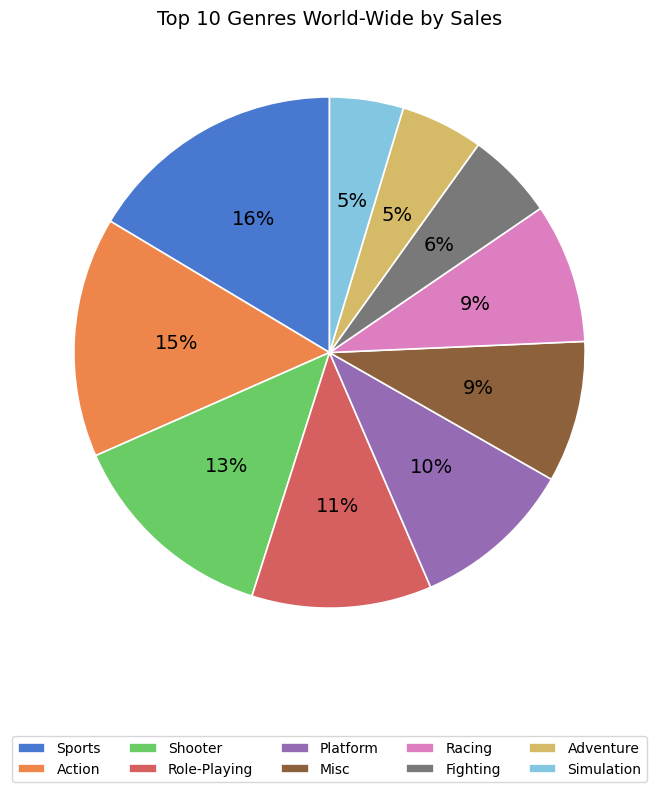

In [41]:

global_genres = df.groupby('Genre')[['Global_Sales']].sum()

world_wide_sales = global_genres.sum(axis=1)

world_wide_sales = world_wide_sales.nlargest(10)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(world_wide_sales.values,
       labels=None,
       autopct='%1.0f%%',
       startangle=90,
       colors=sns.color_palette("muted", n_colors=len(world_wide_sales)),
       wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
       textprops={'fontsize': 14}
      )


ax.set_title('Top 10 Genres World-Wide by Sales', fontsize=14)


plt.legend(bbox_to_anchor=(0.5, -0.1),
           loc='upper center',
           borderaxespad=0,
           ncol=len(world_wide_sales)/2,
           labels=world_wide_sales.index
           )

plt.tight_layout()

top 10 games by sales

Text(0.5, 1.0, 'Top 10 Best-Selling Games')

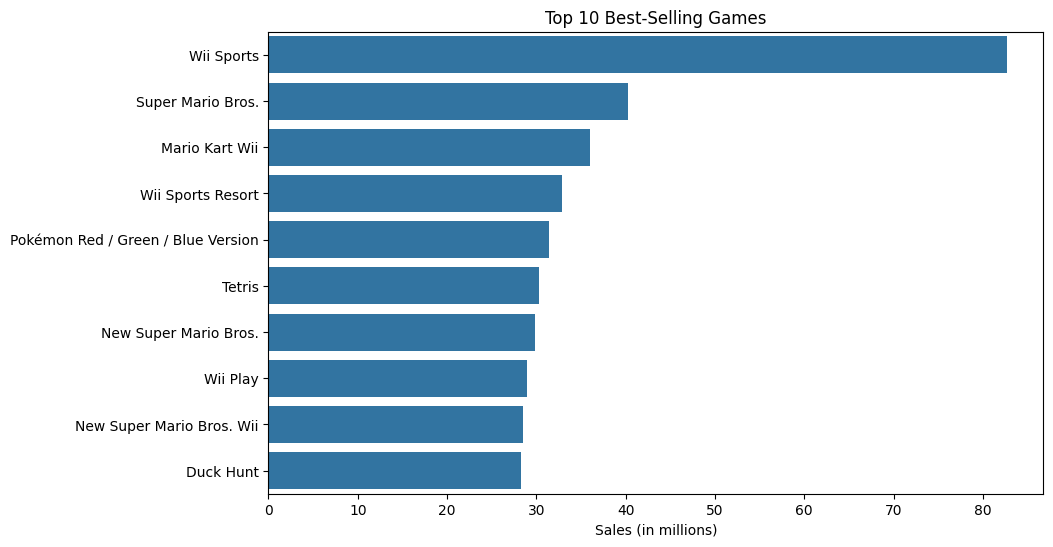

In [ ]:
top_games = df[['Name', 'Global_Sales']].nlargest(10, 'Global_Sales')
top_games.groupby('Name').sum()

plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_games)

plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Top 10 Best-Selling Games')

# Platform Analysis

top platforms regional

<ipython-input-15-155090954491>:6: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_filtered['Region'] = df_filtered[region_columns].idxmax(skipna=True,axis=1)
<ipython-input-15-155090954491>:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


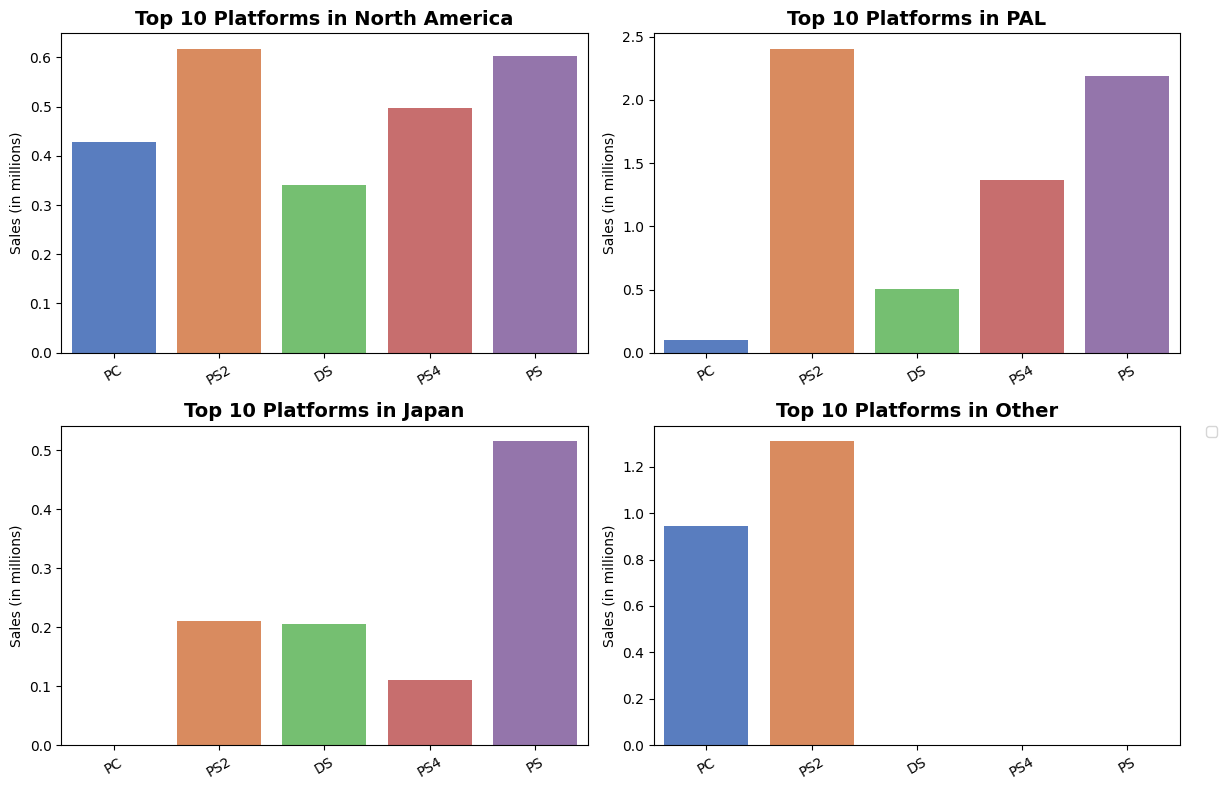

In [ ]:
top_platforms = df['Platform'].value_counts().nlargest(5).index
df_filtered = df[df['Platform'].isin(top_platforms)].copy()
region_columns = ['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']

# dominant sales region, with handling for NaN values
df_filtered['Region'] = df_filtered[region_columns].idxmax(skipna=True,axis=1)


region_mapping = {'NA_Sales': 'North America', 'PAL_Sales': 'PAL', 'JP_Sales': 'Japan', 'Other_Sales': 'Other'}
df_filtered['Region'] = df_filtered['Region'].replace(region_mapping)

regions = ['North America', 'PAL', 'Japan', 'Other']

# color palette based on the number of platforms
palette_colors = sns.color_palette("muted", n_colors=len(top_platforms))
genre_color_map = dict(zip(top_platforms, palette_colors))

# subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    region_data = df_filtered[df_filtered['Region'] == region]

    sns.barplot(data=region_data, x='Platform', y='Global_Sales', ax=ax,
                order=top_platforms, palette=genre_color_map, errorbar=None, hue='Platform', legend=False)

    ax.set_title(f"Top 10 Platforms in {region}", fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Sales (in millions)')
    ax.tick_params(axis='x', rotation=30, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()



top platforms world wide

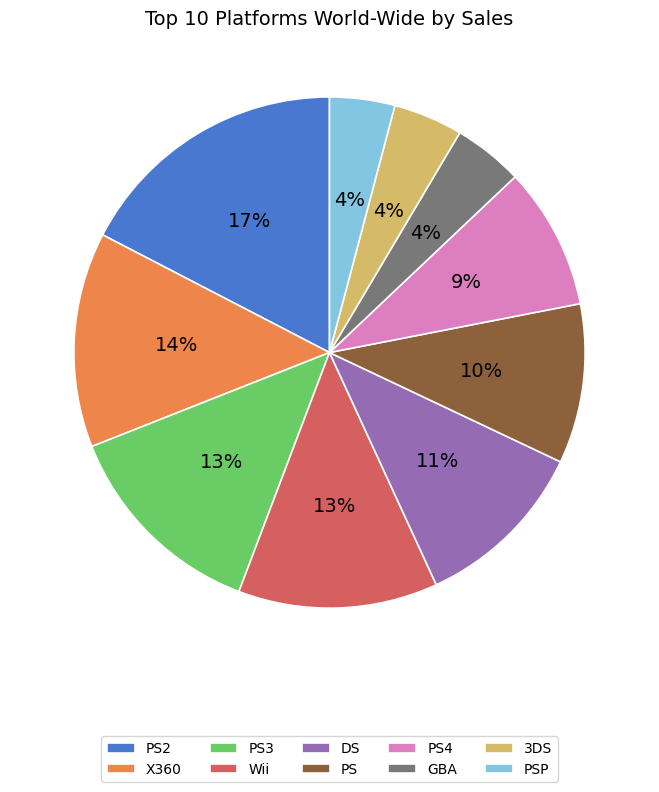

In [38]:

global_platforms = df.groupby('Platform')[['Global_Sales']].sum()

world_wide_sales = global_platforms.sum(axis=1)


world_wide_sales = world_wide_sales.nlargest(10)

# plot pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(world_wide_sales.values, labels=None,
       autopct='%1.0f%%',
       startangle=90,
       colors=sns.color_palette("muted", n_colors=len(world_wide_sales)),
       wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
       textprops={'fontsize': 14}
      )

# layout
ax.set_title('Top 10 Platforms World-Wide by Sales', fontsize=14)
plt.legend(bbox_to_anchor=(0.5, -0.1),
           loc='upper center',
           borderaxespad=0,
           ncol=len(world_wide_sales)/2,
           labels=world_wide_sales.index
           )

plt.tight_layout()